## **Import Statments**

In [1]:
import argparse
import pandas as pd
import os
from tqdm import tqdm as tqdm
import urllib.request
import numpy as np
import sys
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
from keras.layers import Embedding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Reshape
from tensorflow.keras.layers import MultiHeadAttention
import cv2
from collections.abc import Sequence

## **Loading CSV File into Data Frame**

In [2]:
df= pd.read_csv('./real_and_fake.csv')

In [3]:
df

,file,type,split
0,train/real_video/0.mp4,real,train
1,train/attack/0.mp4,attack,train
2,train/real_video/1.mp4,real,train
3,train/attack/1.mp4,attack,train
4,train/real_video/2.mp4,real,train
...,...,...,...
155,test/attack/77.mp4,attack,test
156,test/real_video/78.mp4,real,test
157,test/attack/78.mp4,attack,test
158,test/real_video/79.mp4,real,test


## **Preprocessing for Train Dataset**

In [4]:
os.makedirs('./train_1')
os.makedirs('./train_1/real_image')
os.makedirs('./train_1/attack_image')

## **Capturing Video Frames**

In [5]:
file_list=[]
type_list=[]
for i in range(0,110):
        captured_frame= cv2.VideoCapture(df['file'].iloc[i])
        #ret- Boolean value for indicating success or failure for reading the frame
        ret, frame = captured_frame.read()
        while(captured_frame.isOpened()):
                if (ret != True):
                        break
                # storing the frames in a new folder named train_1
                else:
                        if(df['type'].iloc[i]=='attack'): 
                                filename ='./train_1/attack_image/' + str(i)+'.jpg'
                                file_list.append(filename)
                                type_list.append(0)
                        else:
                                filename ='./train_1/real_image/' + str(i)+'.jpg'
                                file_list.append(filename)
                                type_list.append(1)
                        cv2.imwrite(filename, frame)
                        captured_frame.release()


In [6]:
data={'file':file_list,
      'type':type_list}
df_train=pd.DataFrame(data)

In [7]:
df_train

,file,type
0,./train_1/real_image/0.jpg,1
1,./train_1/attack_image/1.jpg,0
2,./train_1/real_image/2.jpg,1
3,./train_1/attack_image/3.jpg,0
4,./train_1/real_image/4.jpg,1
...,...,...
105,./train_1/attack_image/105.jpg,0
106,./train_1/real_image/106.jpg,1
107,./train_1/attack_image/107.jpg,0
108,./train_1/real_image/108.jpg,1


## **Preprocessing for Test Dataset**

In [8]:
os.makedirs('./test_1')
os.makedirs('./test_1/real_image')
os.makedirs('./test_1/attack_image')

In [9]:
file_list_test=[]
type_list_test=[]
for i in range(111,160):
        captured_frame= cv2.VideoCapture(df['file'].iloc[i])
        #ret- Boolean value for indicating success or failure for reading the frame
        ret, frame = captured_frame.read()
        while(captured_frame.isOpened()):
                if (ret != True):
                        break
                # storing the frames in a new folder named train_1
                else:
                        if(df['type'].iloc[i]=='attack'): 
                                filename ='./test_1/attack_image/' + str(i)+'.jpg'
                                file_list_test.append(filename)
                                type_list_test.append(0)
                        else:
                                filename ='./test_1/real_image/' + str(i)+'.jpg'
                                file_list_test.append(filename)
                                type_list_test.append(1)
                        cv2.imwrite(filename, frame)
                        captured_frame.release()


In [10]:
data_test={'file':file_list_test,
      'type':type_list_test}
df_test=pd.DataFrame(data_test)

In [11]:
df_test

,file,type
0,./test_1/attack_image/111.jpg,0
1,./test_1/real_image/112.jpg,1
2,./test_1/attack_image/113.jpg,0
3,./test_1/real_image/114.jpg,1
4,./test_1/attack_image/115.jpg,0
5,./test_1/real_image/116.jpg,1
6,./test_1/attack_image/117.jpg,0
7,./test_1/real_image/118.jpg,1
8,./test_1/attack_image/119.jpg,0
9,./test_1/real_image/120.jpg,1


In [12]:
def load_image(image_path, target_size=(244, 244)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    return img

image_data = []
for index, row in df_train.iterrows():
    try:
        img_dir = row.loc['file']
        img = load_image(img_dir, target_size=(244, 244))
        image_data.append(img)
    except Exception as e:
        print(f"Error loading image {img_dir}: {str(e)}")

In [13]:
image_data

[array([[[[0.44313726, 0.4117647 , 0.36078432],
          [0.4117647 , 0.38039216, 0.32941177],
          [0.39215687, 0.3529412 , 0.30588236],
          ...,
          [0.3137255 , 0.32156864, 0.2784314 ],
          [0.29803923, 0.30588236, 0.2627451 ],
          [0.25882354, 0.26666668, 0.22352941]],
 
         [[0.40392157, 0.37254903, 0.32156864],
          [0.40784314, 0.3764706 , 0.3254902 ],
          [0.4117647 , 0.37254903, 0.3254902 ],
          ...,
          [0.29411766, 0.3019608 , 0.25882354],
          [0.28235295, 0.2901961 , 0.24705882],
          [0.2784314 , 0.28627452, 0.24313726]],
 
         [[0.5137255 , 0.48235294, 0.43137255],
          [0.49803922, 0.46666667, 0.41568628],
          [0.5058824 , 0.46666667, 0.41960785],
          ...,
          [0.30980393, 0.31764707, 0.27450982],
          [0.29803923, 0.30588236, 0.2627451 ],
          [0.22745098, 0.23529412, 0.19215687]],
 
         ...,
 
         [[0.5294118 , 0.2       , 0.05882353],
          [0.52549

In [14]:
image_data = np.vstack(image_data)

In [15]:
image_data_test = []
for index, row in df_test.iterrows():
    try:
        img_dir = row.loc['file']
        img = load_image(img_dir, target_size=(244, 244))
        image_data_test.append(img)
    except Exception as e:
        print(f"Error loading image {img_dir}: {str(e)}")

In [16]:
image_data_test

[array([[[[0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         [[0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         [[0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         ...,
 
         [[0.02745098, 0.00392157, 0.00392157],
          [0.02745

In [17]:
image_data_test = np.vstack(image_data_test)

In [18]:
y_train = df_train['type']
y_test = df_test['type']

In [19]:
y_test

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    0
25    1
26    0
27    1
28    0
29    1
30    0
31    1
32    0
33    1
34    0
35    1
36    0
37    1
38    0
39    1
40    0
41    1
42    0
43    1
44    0
45    1
46    0
47    1
48    0
Name: type, dtype: int64

In [20]:
image_data.shape[1:]

(244, 244, 3)

## **Building CNN-SVM Model**

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# Reshape images to 1D sequences
X_reshaped = image_data.reshape(image_data.shape[0], -1)

# Create a Conv1D model for feature extraction
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())


# Extract features using the Conv1D model
X_train_features = model.predict(image_data.reshape(image_data.shape[0], X_reshaped.shape[1], 1))
X_test_features = model.predict(image_data_test.reshape(image_data_test.shape[0], X_reshaped.shape[1], 1))

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, y_train)

y_pred = svm_model.predict(X_test_features)


Hiiiii178608
2/2 [==============================] - 5s 2s/step


## **Evaluation Metrics**

accuracy is  0.8571428571428571
F1 Score: 0.8679245283018867
Recall: 0.9583333333333334
Precision: 0.7931034482758621
ROC AUC Score: 0.8591666666666667


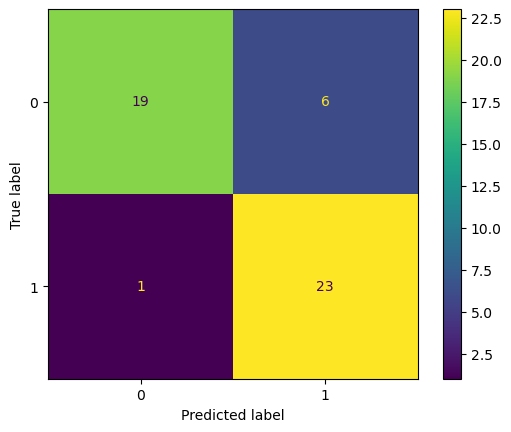

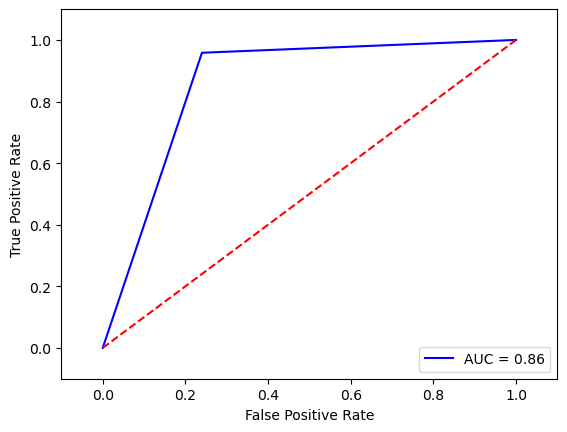

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.79      0.96      0.87        24

    accuracy                           0.86        49
   macro avg       0.87      0.86      0.86        49
weighted avg       0.87      0.86      0.86        49



In [22]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, recall_score, precision_score, confusion_matrix,  ConfusionMatrixDisplay, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculate the Accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy is ", accuracy)

# Calculate the F1 score
f1score= f1_score(y_test, y_pred)
print("F1 Score:", f1score)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_features, y_test)
plt.show()


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(classification_report(y_test, y_pred))